This notebook follows https://github.com/khanhnamle1994/movielens?tab=readme-ov-file

In [3]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data from https://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [4]:
DATASET_DIR = 'ml-latest-small'
df = pd.read_csv(os.path.join(DATASET_DIR, 'links.csv'))
print(df.isnull().sum())
df.head()

movieId    0
imdbId     0
tmdbId     8
dtype: int64


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
movies_df = pd.read_csv(os.path.join(DATASET_DIR, 'movies.csv'))
print(movies_df.isnull().sum())
movies_df.head()

movieId    0
title      0
genres     0
dtype: int64


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
ratings_df = pd.read_csv(os.path.join(DATASET_DIR, 'ratings.csv'))
print(ratings_df.isnull().sum())
print(ratings_df.columns)
ratings_df.head()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
tags_df = pd.read_csv(os.path.join(DATASET_DIR, 'tags.csv'))
print(tags_df.isnull().sum())
print(tags_df.columns)
tags_df.head()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [8]:
tags_df.groupby(['userId', 'movieId', 'tag']).count()

timestamp
userId movieId tag                        
2      60756   Highly quotable           1
               funny                     1
               will ferrell              1
       89774   Boxing story              1
               MMA                       1
...                                    ...
606    7382    for katie                 1
       7936    austere                   1
610    3265    gun fu                    1
               heroic bloodshed          1
       168248  Heroic Bloodshed          1

[3683 rows x 1 columns]

In [9]:
joined_df = (ratings_df
             .set_index('movieId')
             .join(tags_df.set_index('movieId'), lsuffix='_r', rsuffix='_t')
             .join(movies_df.set_index('movieId'))
            )

joined_df.head()

# joined_df.groupby(['userId_r', 'movieId'])['rating'].aggregate()


,userId_r,rating,timestamp_r,userId_t,tag,timestamp_t,title,genres
movieId,,,,,,,,
1,1,4.0,964982703,336.0,pixar,1.139046e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,4.0,964982703,474.0,pixar,1.137207e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,4.0,964982703,567.0,fun,1.525286e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,1,4.0,964981247,289.0,moldy,1.143425e+09,Grumpier Old Men (1995),Comedy|Romance
3,1,4.0,964981247,289.0,old,1.143425e+09,Grumpier Old Men (1995),Comedy|Romance


Use wordcloud to see which are the most popular titles. 

(-0.5, 5999.5, 1999.5, -0.5)

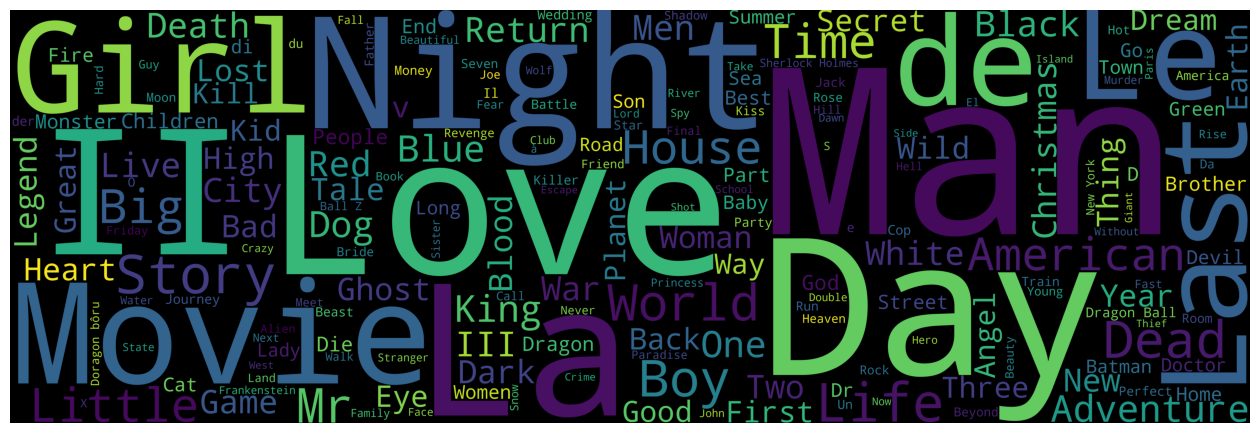

In [10]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
movies_df['title'] = movies_df['title'].fillna("").astype('str')
title_corpus = ' '.join(movies_df['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=6000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')

In [11]:
ratings_df['rating'].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

The distplot shows the distibution of the movie ratings.

/tmp/ipykernel_15054/955986682.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_df['rating'].fillna(ratings_df['rating'].mean()))


<Axes: xlabel='rating', ylabel='Density'>

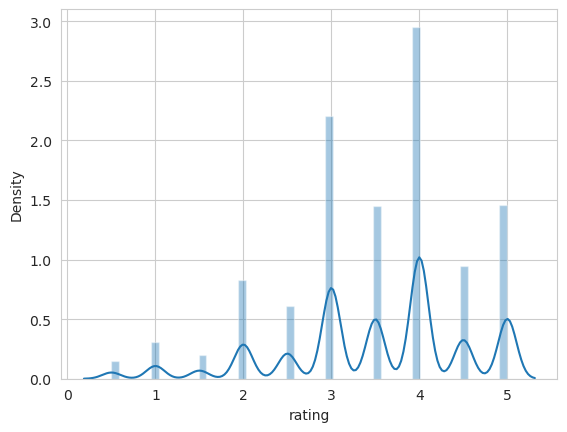

In [12]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
sns.distplot(ratings_df['rating'].fillna(ratings_df['rating'].mean()))

Show the top rated movies. Although the top rated movies have 5 stars, it also shows that most of them have very few ratings.

In [13]:
joined_df.groupby(['title'])['rating'].aggregate(['mean', 'count']).sort_values(by=['mean', 'count'], ascending=False).head(20)

,mean,count
title,,
Come and See (Idi i smotri) (1985),5.0,10
More (1998),5.0,7
Who Killed Chea Vichea? (2010),5.0,5
Belle époque (1992),5.0,2
Enter the Void (2009),5.0,2
Heidi Fleiss: Hollywood Madam (1995),5.0,2
Into the Woods (1991),5.0,2
Jonah Who Will Be 25 in the Year 2000 (Jonas qui aura 25 ans en l'an 2000) (1976),5.0,2
Lamerica (1994),5.0,2


Which genres are the most popular.

In [14]:
genre_labels = set()
for s in joined_df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

keyword_count = dict()
for genre in genre_labels:
    keyword_count[genre] = 0

for s in joined_df['genres'].str.split('|').values:
    for g_label in s:
        keyword_count[g_label] += 1 

sorted(keyword_count.items(), key=lambda x: x[1], reverse=True)[:5]


[('Drama', 167783),
 ('Thriller', 130834),
 ('Comedy', 119180),
 ('Crime', 110712),
 ('Action', 86976)]

# Content based filtering (neighborhood based filtering) (memory based filtering)

In [15]:
movies_df['genres'] = movies_df['genres'].str.split('|').values
movies_df['genres'] = movies_df['genres'].fillna("").astype('str')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),"['Adventure', 'Animation', 'Children', 'Comedy..."
1,2,Jumanji (1995),"['Adventure', 'Children', 'Fantasy']"
2,3,Grumpier Old Men (1995),"['Comedy', 'Romance']"
3,4,Waiting to Exhale (1995),"['Comedy', 'Drama', 'Romance']"
4,5,Father of the Bride Part II (1995),['Comedy']


Compare the similarity of each movie using the genres. However, we must turn the genres into vectors first using tfidf. 

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1,2), min_df=0.0)
tfidf_matrix = tf.fit_transform(movies_df['genres'])
tfidf_matrix.shape

(9742, 177)

After the genres have been vectorized. Similarity is computed using cosine.

In [17]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(9742, 9742)

Get the top 20 most similar movies to a given title using the consine_sim similarity matrix.

In [18]:
titles = movies_df['title']
indices = pd.Series(movies_df.index, index=movies_df['title'])

def generate_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

# indices

In [19]:
generate_recommendations('Good Will Hunting (1997)').head(20)

24                            Leaving Las Vegas (1995)
27                                   Persuasion (1995)
42                How to Make an American Quilt (1995)
45                        When Night Is Falling (1995)
66                                 Bed of Roses (1996)
75     Once Upon a Time... When We Were Colored (1995)
76                           Angels and Insects (1995)
93               Bridges of Madison County, The (1995)
115                       Up Close and Personal (1996)
151                                    Mad Love (1995)
162                         Scarlet Letter, The (1995)
170                               Total Eclipse (1995)
175                       Walk in the Clouds, A (1995)
183                              Before Sunrise (1995)
189                           Circle of Friends (1995)
213                            Immortal Beloved (1994)
232                                 Love Affair (1994)
261                  Picture Bride (Bijo photo) (1994)
262       

In [20]:
generate_recommendations('Toy Story (1995)').head(20)

1706                                          Antz (1998)
2355                                   Toy Story 2 (1999)
2809       Adventures of Rocky and Bullwinkle, The (2000)
3000                     Emperor's New Groove, The (2000)
3568                                Monsters, Inc. (2001)
6194                                     Wild, The (2006)
6486                               Shrek the Third (2007)
6948                       Tale of Despereaux, The (2008)
7760    Asterix and the Vikings (Astérix et les Viking...
8219                                         Turbo (2013)
8927                             The Good Dinosaur (2015)
9430                                         Moana (2016)
5490    Twelve Tasks of Asterix, The (Les douze travau...
6448           TMNT (Teenage Mutant Ninja Turtles) (2007)
8357                                The Lego Movie (2014)
3194                                         Shrek (2001)
7530                               Gnomeo & Juliet (2011)
7805        Pu

In [21]:
generate_recommendations('Saving Private Ryan (1998)').head(20)

909                           Apocalypse Now (1979)
933                    Boot, Das (Boat, The) (1981)
1407          All Quiet on the Western Front (1930)
1503                     Saving Private Ryan (1998)
1826                      Thin Red Line, The (1998)
2216                        Dirty Dozen, The (1967)
2310                        Longest Day, The (1962)
2313                       Tora! Tora! Tora! (1970)
2573                                Red Dawn (1984)
2631                  Force 10 from Navarone (1978)
2716                   Fighting Seabees, The (1944)
2808                            Patriot, The (2000)
3610                      Behind Enemy Lines (2001)
3646                         Black Hawk Down (2001)
3724                        We Were Soldiers (2002)
3856                             Windtalkers (2002)
4114                                    Zulu (1964)
4121      Victory (a.k.a. Escape to Victory) (1981)
4243                       Gods and Generals (2003)
5009    Alex

Make a pydantic BaseModel for the api incoming payload.

In [22]:
from pydantic import BaseModel, ValidationError

class Payload(BaseModel):
    title: str
    
data = {
    'title': 'Saving Private Ryan (1998)'
}
payload = Payload(**data)
generate_recommendations(payload.title).values.astype('str')

array(['Apocalypse Now (1979)', 'Boot, Das (Boat, The) (1981)',
       'All Quiet on the Western Front (1930)',
       'Saving Private Ryan (1998)', 'Thin Red Line, The (1998)',
       'Dirty Dozen, The (1967)', 'Longest Day, The (1962)',
       'Tora! Tora! Tora! (1970)', 'Red Dawn (1984)',
       'Force 10 from Navarone (1978)', 'Fighting Seabees, The (1944)',
       'Patriot, The (2000)', 'Behind Enemy Lines (2001)',
       'Black Hawk Down (2001)', 'We Were Soldiers (2002)',
       'Windtalkers (2002)', 'Zulu (1964)',
       'Victory (a.k.a. Escape to Victory) (1981)',
       'Gods and Generals (2003)',
       'Alexander Nevsky (Aleksandr Nevskiy) (1938)'], dtype='<U43')

A simple flask api that returns the top 20 most similar movies given a title.

In [23]:
from flask import Flask, jsonify, request

app = Flask(__name__)


@app.route('/recommend', methods=['POST'])
def predict():
    try:
        payload = Payload(**request.json)
        recommendations = list(generate_recommendations(payload.title).values)
        response = {
            'recommendations': recommendations
        }
        return jsonify(response), 200
    except ValidationError as e:
        return jsonify(e.errors()), 400

# if __name__ == '__main__':
#     app.run()

# User-Based Rating Prediction
The assumption is that users that rated the same movies similarly are most likely going to enjoy the same movies. 
To predict a user's rating for a movie:
1. Identify other users who have rated the movie.
2. Calculate the Pearson correlation to assess the similarity between these users and the target user. We may need to mean center the ratings for each person to account for the fact that some users rate more generously than others.
3. Select the top 20 most similar users and use the average of their ratings as the predicted rating for the target user.

Since my machine is not strong enough, I will be sampling just 2% of the available users.

In [247]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
ratings_pivoted_df = ratings_df.pivot(index='userId', columns='movieId', values='rating')
ratings_pivoted_df = ratings_pivoted_df.sample(frac=0.02)

# drop columns with no ratings available
ratings_pivoted_df = ratings_pivoted_df.dropna(axis=1, how='all')

standard_ratings_df = pd.DataFrame(scaler.fit_transform(ratings_pivoted_df))
standard_ratings_df.columns = ratings_pivoted_df.columns
standard_ratings_df.index = ratings_pivoted_df.index

user_corr_df = standard_ratings_df.T.corr(method='pearson')
print(user_corr_df.shape)

user_corr_df.iloc[:4, :4]

(12, 12)


userId,256,177,307,230
userId,,,,
256,1.000000,-0.276637,-0.553578,-0.180101
177,-0.276637,1.000000,-0.552024,-0.478282
307,-0.553578,-0.552024,1.000000,-0.439172
230,-0.180101,-0.478282,-0.439172,1.000000


select the users that rated an item.  
from these users select the top 20 most similar to the target user.  
from return the weighted mean reviews for the item from the top 20 most similar users.  
note: Instead of just returning the mean of the reviews. We could use the pearson correlation as weights for the predicted review. This way more similar people have more weight on the predicted review score. However, that is beyond the scope of this notebook.  

In [268]:
def predict_rating(user: int, item: int) -> float:
    # check if rating is already available
    try: 
        if not pd.isna(ratings_pivoted_df.loc[user,item]):
            return ratings_pivoted_df.loc[user,item]
    except KeyError:
        pass
        
    similarity_user_df = user_corr_df.loc[:, user].to_frame()
    # print(similarity_user_df[user])
    # print(similarity_user_df[user]/similarity_user_df[user].sum())
    similarity_user_df.columns = ['similarity_score']
    similar_users_df = (ratings_pivoted_df[item]
                    .to_frame()
                    .dropna()
                    .join(similarity_user_df)
                    .sort_values(by='similarity_score', ascending=False)
                    )
    
    # weights = similarity_user_df
    # rating = similar_users_df[item].mean() 
    rating = similar_users_df[item].mean() 
    return rating
    # return -1.0


item = ratings_pivoted_df.columns[0]
user = ratings_pivoted_df.index[0]
predict_rating(user, item)

userId
256    1.000000
177   -0.276637
307   -0.553578
230   -0.180101
374    1.000000
105   -0.254160
500   -0.110488
78    -0.215672
25     0.008375
457   -0.994596
579    0.865823
52    -0.293657
Name: 256, dtype: float64


4.2

Predict the ratings for the missing ratings.

In [250]:
def fill_ratings(rows):
    item = rows.name
    preds = [predict_rating(user, item) for user in rows.index]
    return preds
        
ratings_filled_df = ratings_pivoted_df.apply(fill_ratings)
ratings_filled_df.head()

movieId,1,2,3,6,7,10,11,16,17,18,...,175401,175431,175435,176371,177593,178613,179133,180095,187541,187593
userId,,,,,,,,,,,,,,,,,,,,,
256,4.2,2.833333,3.5,4.0,1.0,2.5,2.333333,4.0,5.0,5.0,...,4.0,5.0,4.5,4.0,5.0,4.0,5.0,5.0,4.0,5.0
177,5.0,3.500000,3.5,4.0,1.0,2.5,3.000000,3.0,5.0,4.0,...,4.0,5.0,4.5,4.0,5.0,4.0,5.0,5.0,4.0,5.0
307,4.0,2.500000,3.5,4.0,1.0,2.5,2.333333,4.5,5.0,3.0,...,4.0,5.0,4.5,4.0,5.0,4.0,5.0,5.0,4.0,5.0
230,4.2,2.500000,3.5,4.0,1.0,2.5,2.333333,4.0,5.0,4.0,...,4.0,5.0,4.5,4.0,5.0,4.0,5.0,5.0,4.0,5.0
374,4.2,2.833333,3.5,4.0,1.0,2.5,2.333333,4.0,5.0,4.0,...,4.0,5.0,4.5,4.0,5.0,4.0,5.0,5.0,4.0,5.0


In [255]:
def recommend(user:int):
    '''return the top 20 highest predicted ratings'''
    idx = ratings_filled_df.T[user].sort_values(ascending=False)[:20].to_frame()
    return list(idx.join(movies_df.set_index('movieId'))['title'].values)

user = ratings_pivoted_df.index[5]
recommend(user)

['Deadpool 2 (2018)',
 "Ivan's Childhood (a.k.a. My Name is Ivan) (Ivanovo detstvo) (1962)",
 "Emperor's New Groove, The (2000)",
 'Cast Away (2000)',
 'Decalogue, The (Dekalog) (1989)',
 'Blow (2001)',
 'Hunt, The (Jagten) (2012)',
 'End of Watch (2012)',
 'Samsara (2011)',
 'Pitch Perfect (2012)',
 'Prestige, The (2006)',
 'Clockwork Orange, A (1971)',
 "Geri's Game (1997)",
 'Moscow Does Not Believe in Tears (Moskva slezam ne verit) (1979)',
 'K-PAX (2001)',
 'Presto (2008)',
 'Front of the Class (2008)',
 'Donnie Darko (2001)',
 'Jiro Dreams of Sushi (2011)',
 'Very Potter Sequel, A (2010)']

Overall, user-based neighborhood filtering is very simple and easy to interpret. However, it requires a large amount of memory to generate the predicted review per user-item combination. It is also suffers from the sparsity of recommendations available.

# Collaborative Filtering Recommendation Model
In this approach we combine both the user and items information to create a better recommendation

In [256]:
ratings_df['userId'] = ratings_df['userId'].fillna(0)
ratings_df['movieId'] = ratings_df['movieId'].fillna(0)
ratings_df['rating'] = ratings_df['rating'].fillna(ratings_df['rating'].mean())

In [257]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [258]:
train_df, valid_df = train_test_split(ratings_df.sample(frac=0.02))

In [259]:
train_data_matrix = train_df[['userId', 'movieId', 'rating']].to_numpy()
valid_data_matrix = valid_df[['userId', 'movieId', 'rating']].to_numpy()
print(train_data_matrix.shape)
print(valid_data_matrix.shape)

(1512, 3)
(505, 3)


In [260]:
from sklearn.metrics.pairwise import pairwise_distances

user_correlation = 1 - pairwise_distances(train_df, metric='correlation')
print(user_correlation.shape)
user_correlation[:4, :4]

(1512, 1512)


array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [261]:
item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0 
print(item_correlation[:4, :4])

[[ 1.          0.02196133 -0.06005658]
 [ 0.02196133  1.         -0.03504474]
 [-0.06005658 -0.03504474  1.        ]]


In [262]:
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [263]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(pred, actual):
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [264]:
user_prediction = predict(train_data_matrix, user_correlation, type='user')
print(f'User-based CF RMSE: {rmse(user_prediction, valid_data_matrix)}')

item_prediction = predict(train_data_matrix, item_correlation, type='item')
print(f'User-based CF RMSE: {rmse(item_prediction, valid_data_matrix)}')

User-based CF RMSE: 22414.52275093652
User-based CF RMSE: 26884.812368591534
[[1.660e+02 5.690e+03 5.000e+00]
 [2.980e+02 8.907e+03 5.000e-01]
 [2.210e+02 1.278e+03 5.000e+00]
 ...
 [4.770e+02 6.620e+03 5.000e+00]
 [4.800e+02 3.252e+03 4.500e+00]
 [3.570e+02 3.448e+03 3.000e+00]]


rmse on train data

In [35]:
print(f'User-based CF RMSE: {rmse(user_prediction, train_data_matrix)}')
print(f'User-based CF RMSE: {rmse(item_prediction, train_data_matrix)}')

User-based CF RMSE: 16622.182065849134
User-based CF RMSE: 2280.660052961639


# Collaborative filtering using pytorch
We can also implement this in pytorch.

In [315]:
ratings_df.duplicated().sum()

0

In [316]:
max_userid = ratings_df['userId'].max()
max_movieid = ratings_df['movieId'].max()

print(f'max_userid: {max_userid}, max_movieid: {max_movieid}')
RNG_SEED = 0
# Create training set
shuffled_ratings = ratings_df.sample(frac=1., random_state=RNG_SEED)

# Shuffling users
Users = shuffled_ratings['userId'].values
print(f'Users: {Users}, shape = {Users.shape}')

# Shuffling movies
Movies = shuffled_ratings['movieId'].values
print(f'Movies:{Movies}, shape = {Movies.shape}')

# Shuffling ratings
Ratings = shuffled_ratings['rating'].values
print(f'Ratings:{Ratings}, shape = {Ratings.shape}')

max_userid: 610, max_movieid: 193609
Users: [276 599 483 ... 288 292 440], shape = (100836,)
Movies:[ 780 7624 1320 ... 2529 1307 7361], shape = (100836,)
Ratings:[5.  2.5 2.5 ... 5.  3.  4. ], shape = (100836,)


In [307]:
# Import Keras libraries
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
# Import CF Model Architecture
from CFModel import CFModel

In [308]:
# Define constants
K_FACTORS = 100 # The number of dimensional embeddings for movies and users
TEST_USER = 2000 # A random test user (user_id = 2000)

In [320]:
# Define model
model = CFModel(max_userid+1, max_movieid+1, K_FACTORS)

/home/uz/anaconda3/envs/gcash/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [322]:
# Callbacks monitor the validation loss
# Save the model weights each time the validation loss has improved
callbacks = [EarlyStopping('val_loss', patience=2), 
             ModelCheckpoint('weights.h5.keras', save_best_only=True)]

# Use 30 epochs, 90% training data, 10% validation data 
history = model.model.fit([Users, Movies], Ratings, validation_split=.1, verbose=2, callbacks=callbacks)
# history = model.model.fit([Users, Movies], Ratings)

2836/2836 - 341s - 120ms/step - loss: 6.7084 - val_loss: 1.9432


### Root Mean Square Error
During the training process above, I saved the model weights each time the validation loss has improved. Thus, I can use that value to calculate the best validation Root Mean Square Error.

In [324]:
import math
# Show the best validation RMSE
min_val_loss, idx = min((val, idx) for (idx, val) in enumerate(history.history['val_loss']))
print('Minimum RMSE at epoch', '{:d}'.format(idx+1), '=', '{:.4f}'.format(math.sqrt(min_val_loss)))

Minimum RMSE at epoch 1 = 1.3940


The best validation loss is at epoch 1. RMSE value of *1.3940*.

### Predict the Ratings
The next step is to actually predict the ratings a random user will give to a random movie. Below I apply the freshly trained deep learning model for all the users and all the movies, using 100 dimensional embeddings for each of them. 

In [326]:
# Use the pre-trained model
trained_model = CFModel(max_userid+1, max_movieid+1, K_FACTORS)
# Load weights
trained_model.model.load_weights('weights.h5.keras')

In [329]:
test_user = Users[0]
test_user

276

In [330]:
# Function to predict the ratings given User ID and Movie ID
def predict_rating(user_id, movie_id):
    return trained_model.rate(user_id - 1, movie_id - 1)

Here I show the top 20 movies that test user has already rated, including the *predictions* column showing the values that used test user would have rated based on the newly defined *predict_rating* function.

In [334]:
user_ratings = ratings_df[ratings_df['userId'] == test_user][['userId', 'movieId', 'rating']]
user_ratings['prediction'] = user_ratings.apply(lambda x: predict_rating(test_user, x['movieId']), axis=1)
user_ratings.sort_values(by='rating', 
                         ascending=False).merge(movies_df, 
                                                on='movieId', 
                                                how='inner', 
                                                suffixes=['_u', '_m']).head(20)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/home/uz/anaconda3/envs/gcash/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['user_input', 'item_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

,userId,movieId,rating,prediction,title,genres
0,276,1391,5.0,2.451788,Mars Attacks! (1996),"['Action', 'Comedy', 'Sci-Fi']"
1,276,260,5.0,1.472276,Star Wars: Episode IV - A New Hope (1977),"['Action', 'Adventure', 'Sci-Fi']"
2,276,648,5.0,4.173940,Mission: Impossible (1996),"['Action', 'Adventure', 'Mystery', 'Thriller']"
3,276,780,5.0,0.853656,Independence Day (a.k.a. ID4) (1996),"['Action', 'Adventure', 'Sci-Fi', 'Thriller']"
4,276,783,5.0,2.727031,"Hunchback of Notre Dame, The (1996)","['Animation', 'Children', 'Drama', 'Musical', ..."
5,276,784,5.0,3.867411,"Cable Guy, The (1996)","['Comedy', 'Thriller']"
6,276,480,5.0,1.721771,Jurassic Park (1993),"['Action', 'Adventure', 'Sci-Fi', 'Thriller']"
7,276,466,5.0,0.037465,Hot Shots! Part Deux (1993),"['Action', 'Comedy', 'War']"
8,276,370,5.0,0.713227,Naked Gun 33 1/3: The Final Insult (1994),"['Action', 'Comedy']"
9,276,364,5.0,0.854282,"Lion King, The (1994)","['Adventure', 'Animation', 'Children', 'Drama'..."


No surpise that these top movies all have 5-start rating. A lot of the prediction values seem off.

### Recommend Movies
Here I make a recommendation list of unrated 20 movies sorted by prediction value for test user. Let's see it.

In [336]:
recommendations = ratings_df[ratings_df['movieId'].isin(user_ratings['movieId']) == False][['movieId']].drop_duplicates()
recommendations['prediction'] = recommendations.apply(lambda x: predict_rating(test_user, x['movieId']), axis=1)
recommendations.sort_values(by='prediction',
                          ascending=False).merge(movies_df,
                                                 on='movieId',
                                                 how='inner',
                                                 suffixes=['_u', '_m']).head(20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

,movieId,prediction,title,genres
0,319,5.360719,Shallow Grave (1994),"['Comedy', 'Drama', 'Thriller']"
1,152,5.349574,"Addiction, The (1995)","['Drama', 'Horror']"
2,905,5.337604,It Happened One Night (1934),"['Comedy', 'Romance']"
3,2330,5.315209,Hands on a Hard Body (1996),"['Comedy', 'Documentary']"
4,1194,5.280939,Cheech and Chong's Up in Smoke (1978),['Comedy']
5,1253,5.218529,"Day the Earth Stood Still, The (1951)","['Drama', 'Sci-Fi', 'Thriller']"
6,2020,5.188769,Dangerous Liaisons (1988),"['Drama', 'Romance']"
7,2325,5.185941,Orgazmo (1997),['Comedy']
8,7362,5.183340,Taking Lives (2004),"['Crime', 'Drama', 'Thriller']"
9,913,5.162613,"Maltese Falcon, The (1941)","['Film-Noir', 'Mystery']"


## Conclusion
The deeplearning model recommended some movies. However the predicted ratings exceed 5.